# Task 1

In [35]:
import sys
sys.path.append('../src')

from data_quality_check import DataQualityCheck
from data_cleaning import DataCleaning
from connection import PostgresConnection

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import psycopg2
import numpy as np

## Load the fetched data into a Pandas DataFrame from postgres database:

### Write SQL queries to extract the relevant data from the dataset:

In [36]:
# Connect to the PostgreSQL database
db = PostgresConnection(dbname='bank', user='postgres', password='Mati@1993')
db.connect()

# Create SQL queries for each table
telegram_posts_sql_query = """ SELECT * FROM public.telegram_posts """
google_play_reviews_sql_query = """ SELECT * FROM public.google_play_reviews """
boa_telegram_channel_subscriber_sql_query = """ SELECT * FROM public.boa_telegram_channel_subscriber """
google_play_downloads_sql_query = """ SELECT * FROM public.google_play_downloads """

# Execute SQL queries and load data into Pandas DataFrames
telegram_posts_df = pd.read_sql_query(telegram_posts_sql_query, db.conn)
google_play_reviews_df = pd.read_sql_query(google_play_reviews_sql_query, db.conn)
google_play_downloads_df = pd.read_sql_query(google_play_downloads_sql_query, db.conn)
boa_telegram_channel_subscriber_df = pd.read_sql_query(boa_telegram_channel_subscriber_sql_query, db.conn)

# Close the database connection
db.close_connection()

Connected to PostgreSQL database!
Connection closed.


C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_24776\3469817603.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  telegram_posts_df = pd.read_sql_query(telegram_posts_sql_query, db.conn)
C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_24776\3469817603.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  google_play_reviews_df = pd.read_sql_query(google_play_reviews_sql_query, db.conn)
C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_24776\3469817603.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


### Telegram Posts

In [37]:

# Print the first few rows of each DataFrame
print("Telegram Posts DataFrame:")
print(telegram_posts_df.head())

Telegram Posts DataFrame:
   id                                   keyword  \
0   1                                       NaN   
1   2  #bank, #bankofabyssinia, bankofabyssinia   
2   3                                     #bank   
3   4  #bank, #bankofabyssinia, bankofabyssinia   
4   5  #bank, #bankofabyssinia, bankofabyssinia   

                           post_link   views        date post_hour time_of_day  
0  https://t.me/tikvahethiopia/87794  211354  2024-05-21  12:40:51   afternoon  
1  https://t.me/tikvahethiopia/87693  240558  2024-05-17  08:08:16     morning  
2  https://t.me/tikvahethiopia/87636  249862  2024-05-14  07:49:21     morning  
3  https://t.me/tikvahethiopia/87532  280144  2024-05-10  13:39:46   afternoon  
4  https://t.me/tikvahethiopia/87496  304225  2024-05-07  10:46:34     morning  


In [44]:
telegram_posts_df.head()

,id,keyword,post_link,views,date,post_hour,time_of_day
0,1,NaN,https://t.me/tikvahethiopia/87794,211354,2024-05-21,12:40:51,afternoon
1,2,"#bank, #bankofabyssinia, bankofabyssinia",https://t.me/tikvahethiopia/87693,240558,2024-05-17,08:08:16,morning
2,3,#bank,https://t.me/tikvahethiopia/87636,249862,2024-05-14,07:49:21,morning
3,4,"#bank, #bankofabyssinia, bankofabyssinia",https://t.me/tikvahethiopia/87532,280144,2024-05-10,13:39:46,afternoon
4,5,"#bank, #bankofabyssinia, bankofabyssinia",https://t.me/tikvahethiopia/87496,304225,2024-05-07,10:46:34,morning


### Google Play Reviews

In [38]:
print("\nGoogle Play Reviews DataFrame:")
print(google_play_reviews_df.head())


Google Play Reviews DataFrame:
             bank                     appId  \
0  Abyssinia Bank  com.boa.boaMobileBanking   
1  Abyssinia Bank  com.boa.boaMobileBanking   
2  Abyssinia Bank  com.boa.boaMobileBanking   
3  Abyssinia Bank  com.boa.boaMobileBanking   
4  Abyssinia Bank  com.boa.boaMobileBanking   

                               reviewId        userName  \
0  f77c9ee3-07b7-4203-9aaa-f019d35abaa6  Chernet Bekele   
1  622762e8-14b9-42eb-b807-8960278d8b34        Hermon Z   
2  9756a397-2464-40d6-8eab-d269c119aa9e    Davinci Tube   
3  fe54afea-6f7b-4fee-bc8a-4af38050cc54  Mohammed Kasim   
4  9340824c-f839-4afe-81af-cd398088f470   Ahadu tesfaye   

                                           userImage  thumbsUpCount  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...            1.0   
1  https://play-lh.googleusercontent.com/a-/ALV-U...            0.0   
2  https://play-lh.googleusercontent.com/a-/ALV-U...            0.0   
3  https://play-lh.googleusercontent.com/a-/AL

In [43]:
google_play_reviews_df.head()

,bank,appId,reviewId,userName,userImage,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,score,content,keywords,LDA_Category,Sentiment,Insight
0,Abyssinia Bank,com.boa.boaMobileBanking,f77c9ee3-07b7-4203-9aaa-f019d35abaa6,Chernet Bekele,https://play-lh.googleusercontent.com/a/ACg8oc...,1.0,None,2024-05-22 17:02:36,None,None,None,4,Cool,None,None,None,None
1,Abyssinia Bank,com.boa.boaMobileBanking,622762e8-14b9-42eb-b807-8960278d8b34,Hermon Z,https://play-lh.googleusercontent.com/a-/ALV-U...,0.0,24.05.07,2024-05-22 10:03:55,None,None,24.05.07,3,What is that disable developer option I have n...,None,None,None,None
2,Abyssinia Bank,com.boa.boaMobileBanking,9756a397-2464-40d6-8eab-d269c119aa9e,Davinci Tube,https://play-lh.googleusercontent.com/a-/ALV-U...,0.0,24.05.07,2024-05-22 05:01:58,None,None,24.05.07,1,Please fix the app i doesn't belongs to Abbssi...,None,None,None,None
3,Abyssinia Bank,com.boa.boaMobileBanking,fe54afea-6f7b-4fee-bc8a-4af38050cc54,Mohammed Kasim,https://play-lh.googleusercontent.com/a-/ALV-U...,0.0,24.05.07,2024-05-21 23:38:28,None,None,24.05.07,5,All,None,None,None,None
4,Abyssinia Bank,com.boa.boaMobileBanking,9340824c-f839-4afe-81af-cd398088f470,Ahadu tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,0.0,24.05.07,2024-05-21 20:53:34,None,None,24.05.07,1,Very poor,None,None,None,None


### Boa Telegram Channel Subscribers

In [39]:
print("\nBoa Telegram Channel Subscribers DataFrame:")
print(boa_telegram_channel_subscriber_df.head())


Boa Telegram Channel Subscribers DataFrame:
       channel_name        date  subscriber_count
0  #bankofabyssinia  2024-05-24                -1
1  #bankofabyssinia  2024-05-23                24
2  #bankofabyssinia  2024-05-22              -104
3  #bankofabyssinia  2024-05-21               -10
4  #bankofabyssinia  2024-05-20               104


In [42]:
boa_telegram_channel_subscriber_df.head()

,channel_name,date,subscriber_count
0,#bankofabyssinia,2024-05-24,-1
1,#bankofabyssinia,2024-05-23,24
2,#bankofabyssinia,2024-05-22,-104
3,#bankofabyssinia,2024-05-21,-10
4,#bankofabyssinia,2024-05-20,104


### Google Play Downloads

In [40]:
print("\nGoogle Play Downloads DataFrame:")
print(google_play_downloads_df.head())


Google Play Downloads DataFrame:
             bank                     appId        date  downloads
0  Abyssinia Bank  com.boa.boaMobileBanking  2024-05-24     100000
1  Abyssinia Bank  com.boa.boaMobileBanking  2024-05-24     100000
2  Abyssinia Bank  com.boa.boaMobileBanking  2024-05-24     100000
3  Abyssinia Bank  com.boa.boaMobileBanking  2024-05-24     100000
4  Abyssinia Bank  com.boa.boaMobileBanking  2024-05-24     100000


In [41]:
google_play_downloads_df.head()

,bank,appId,date,downloads
0,Abyssinia Bank,com.boa.boaMobileBanking,2024-05-24,100000
1,Abyssinia Bank,com.boa.boaMobileBanking,2024-05-24,100000
2,Abyssinia Bank,com.boa.boaMobileBanking,2024-05-24,100000
3,Abyssinia Bank,com.boa.boaMobileBanking,2024-05-24,100000
4,Abyssinia Bank,com.boa.boaMobileBanking,2024-05-24,100000


#### Checking Missing Value and Data Clean Processing

In [46]:
# Create instances of DataQualityCheck and DataCleaning for each DataFrame
telegram_posts_quality_check = DataQualityCheck(telegram_posts_df)
telegram_posts_cleaner = DataCleaning(telegram_posts_df)

google_play_reviews_quality_check = DataQualityCheck(google_play_reviews_df)
google_play_reviews_cleaner = DataCleaning(google_play_reviews_df)

google_play_downloads_quality_check = DataQualityCheck(google_play_downloads_df)
google_play_downloads_cleaner = DataCleaning(google_play_downloads_df)

boa_telegram_channel_subscriber_quality_check = DataQualityCheck(boa_telegram_channel_subscriber_df)
boa_telegram_channel_subscriber_cleaner = DataCleaning(boa_telegram_channel_subscriber_df)

In [48]:
# Display the shape of the dataframe after cleaning, to check any drop column.
telegram_posts_df.head().shape

(5, 3)

In [52]:
# Display the shape of the dataframe after cleaning, to check any drop column.
google_play_reviews_df.head().shape

(5, 17)

In [50]:
# Display the shape of the dataframe after cleaning, to check any drop column.
google_play_downloads_df.head().shape

(5, 4)

In [51]:
# Display the shape of the dataframe after cleaning, to check any drop column.
boa_telegram_channel_subscriber_df.head().shape

(5, 3)

In [53]:
# Display information about the dataframe
telegram_posts_df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5 non-null      int64 
 1   keyword      5 non-null      object
 2   post_link    5 non-null      object
 3   views        5 non-null      int64 
 4   date         5 non-null      object
 5   post_hour    5 non-null      object
 6   time_of_day  5 non-null      object
dtypes: int64(2), object(5)
memory usage: 412.0+ bytes


In [55]:
# Display information about the dataframe
google_play_reviews_df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bank                  5 non-null      object        
 1   appId                 5 non-null      object        
 2   reviewId              5 non-null      object        
 3   userName              5 non-null      object        
 4   userImage             5 non-null      object        
 5   thumbsUpCount         5 non-null      float64       
 6   reviewCreatedVersion  4 non-null      object        
 7   at                    5 non-null      datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            4 non-null      object        
 11  score                 5 non-null      int64         
 12  content               5 non-null      object        
 13  keywords              0 

In [56]:
# Display information about the dataframe
google_play_downloads_df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bank       5 non-null      object
 1   appId      5 non-null      object
 2   date       5 non-null      object
 3   downloads  5 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes


In [57]:
# Display information about the dataframe
boa_telegram_channel_subscriber_df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   channel_name      5 non-null      object
 1   date              5 non-null      object
 2   subscriber_count  5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


## EDA

#### Data Understanding

In [61]:
# Data Understanding
print("Shape of the DataFrame:", telegram_posts_df.shape)
print("Data Types:\n", telegram_posts_df.dtypes)
print("Initial DataFrame:\n", telegram_posts_df.head())

# Summarize Data
print("Data Summary:\n", telegram_posts_df.describe(include='all'))

Shape of the DataFrame: (476, 7)
Data Types:
 id              int64
keyword        object
post_link      object
views           int64
date           object
post_hour      object
time_of_day    object
dtype: object
Initial DataFrame:
    id                                   keyword  \
0   1                                       NaN   
1   2  #bank, #bankofabyssinia, bankofabyssinia   
2   3                                     #bank   
3   4  #bank, #bankofabyssinia, bankofabyssinia   
4   5  #bank, #bankofabyssinia, bankofabyssinia   

                           post_link   views        date post_hour time_of_day  
0  https://t.me/tikvahethiopia/87794  211354  2024-05-21  12:40:51   afternoon  
1  https://t.me/tikvahethiopia/87693  240558  2024-05-17  08:08:16     morning  
2  https://t.me/tikvahethiopia/87636  249862  2024-05-14  07:49:21     morning  
3  https://t.me/tikvahethiopia/87532  280144  2024-05-10  13:39:46   afternoon  
4  https://t.me/tikvahethiopia/87496  304225  2024-05-

In [62]:
# Check for missing values
missing_values = telegram_posts_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = telegram_posts_df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Missing Values:
 id             0
keyword        0
post_link      0
views          0
date           0
post_hour      0
time_of_day    0
dtype: int64
Number of Duplicates: 0


## Univariate Analysis

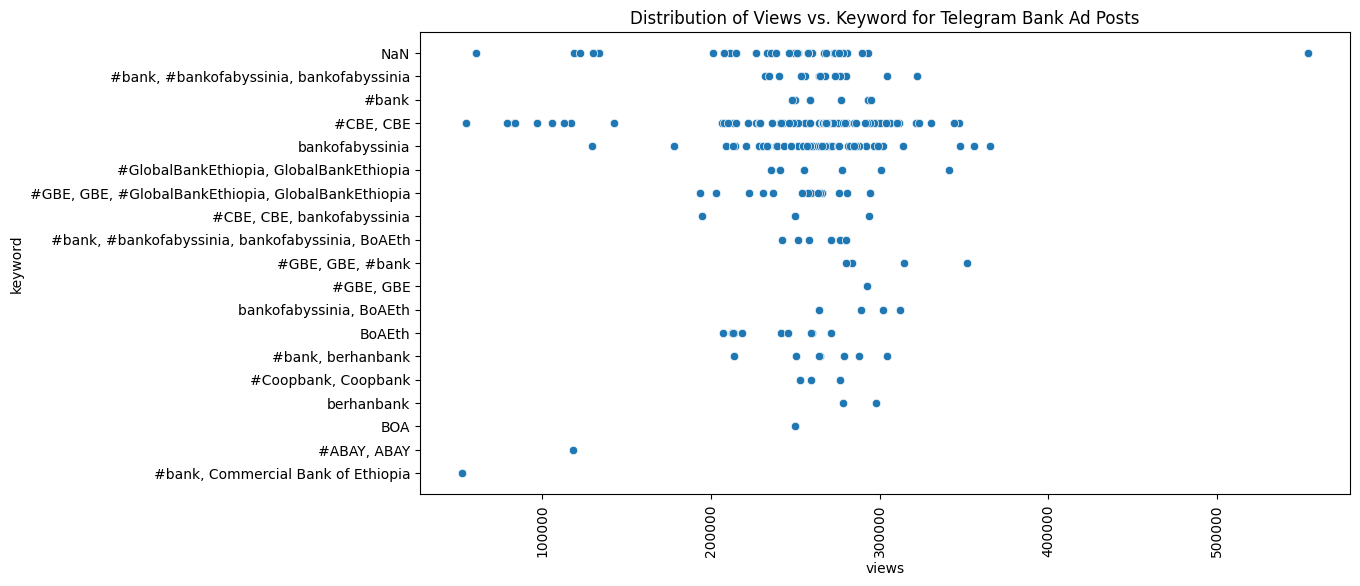

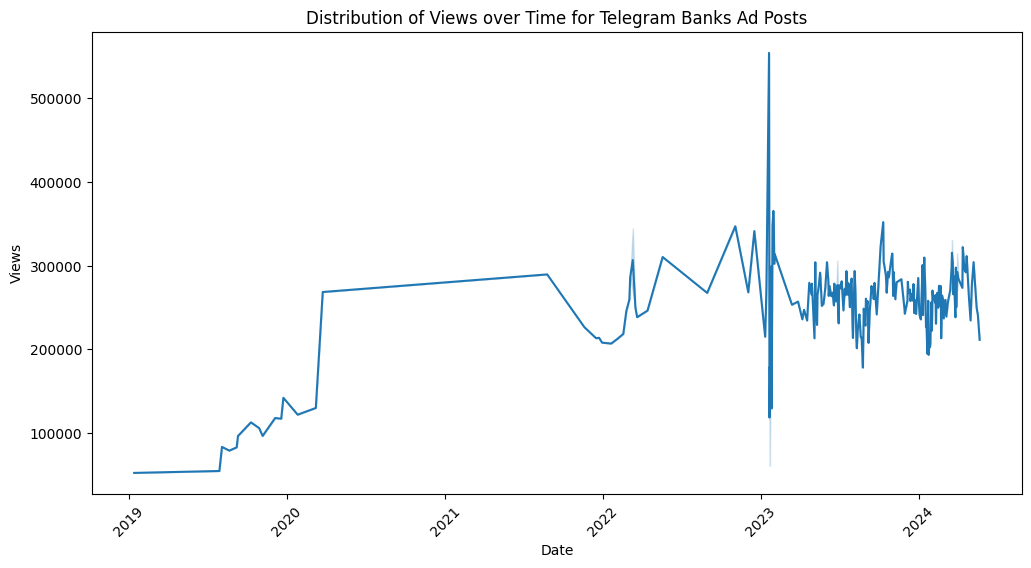

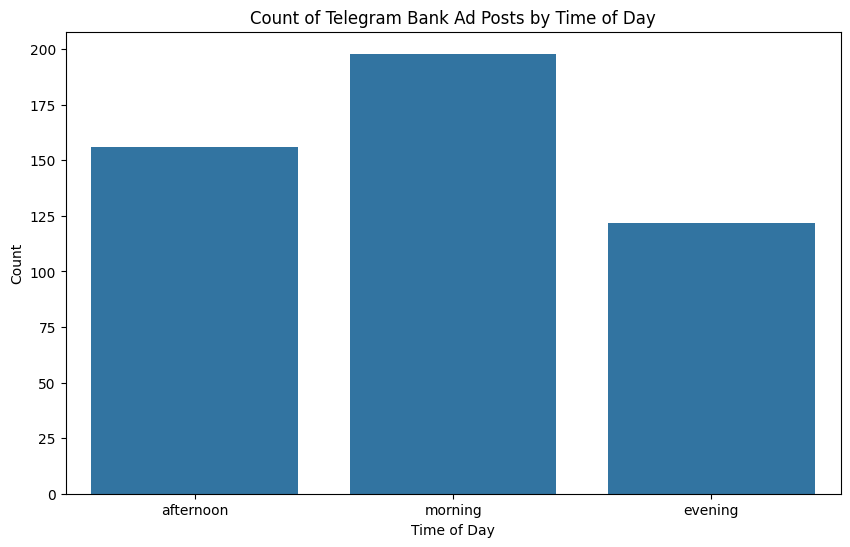

In [72]:
# Telegram Posts DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(data=telegram_posts_df, x='views', y='keyword')
plt.title('Distribution of Views vs. Keyword for Telegram Bank Ad Posts')
plt.xticks(rotation=90)
plt.show()

# Plot distribution of 'views' against 'date' for telegram_posts_df
plt.figure(figsize=(12, 6))
sns.lineplot(data=telegram_posts_df, x='date', y='views')
plt.title('Distribution of Views over Time for Telegram Banks Ad Posts')
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day', data=telegram_posts_df)
plt.title('Count of Telegram Bank Ad Posts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

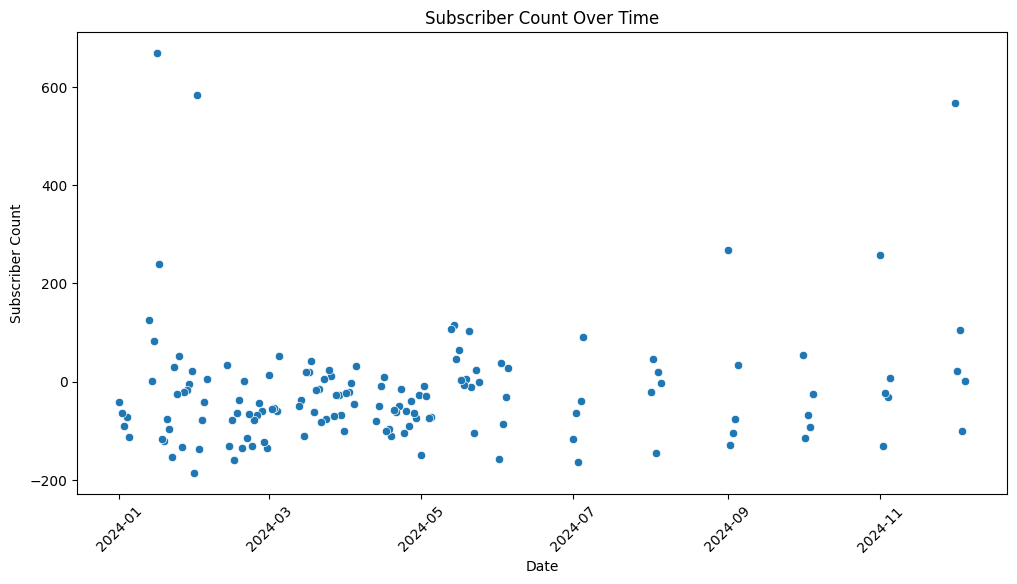

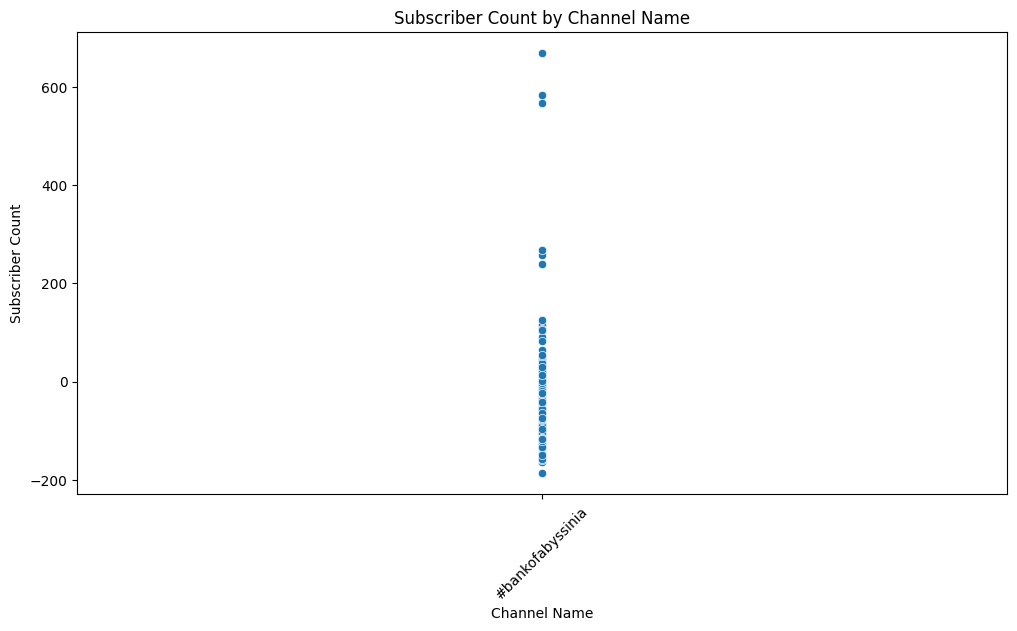

In [75]:
# Scatter plot of 'date' against 'subscriber_count'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=boa_telegram_channel_subscriber_df, x='date', y='subscriber_count')
plt.title('Subscriber Count Over Time')
plt.xlabel('Date')
plt.ylabel('Subscriber Count')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of 'channel_name' against 'subscriber_count'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=boa_telegram_channel_subscriber_df, x='channel_name', y='subscriber_count')
plt.title('Subscriber Count by Channel Name')
plt.xlabel('Channel Name')
plt.ylabel('Subscriber Count')
plt.xticks(rotation=45)
plt.show()

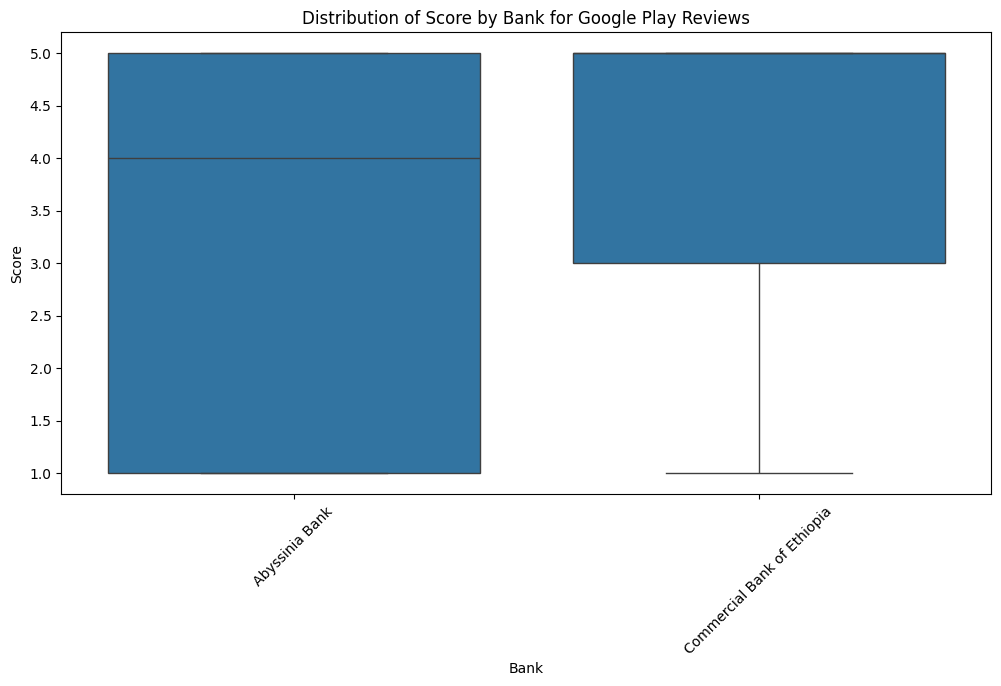

In [74]:
# Plot distribution of a numerical variable against 'bank' for google_play_reviews_df
plt.figure(figsize=(12, 6))
sns.boxplot(data=google_play_reviews_df, x='bank', y='score')
plt.title('Distribution of Score by Bank for Google Play Reviews')
plt.xlabel('Bank')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


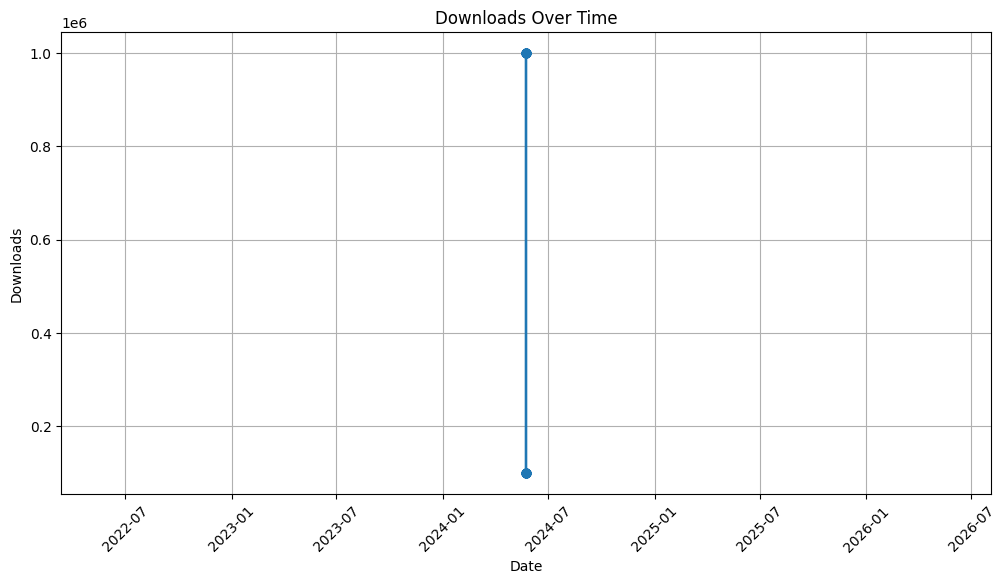

In [76]:
# Convert 'date' column to datetime if it's not already
google_play_downloads_df['date'] = pd.to_datetime(google_play_downloads_df['date'])

# Plotting date vs downloads
plt.figure(figsize=(12, 6))
plt.plot(google_play_downloads_df['date'], google_play_downloads_df['downloads'], marker='o', linestyle='-')
plt.title('Downloads Over Time')
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Bivariate Analysis

In [77]:
# Data Cleaning
telegram_posts_df['keyword'] = telegram_posts_df['keyword'].fillna('unknown')
telegram_posts_df['views'] = pd.to_numeric(telegram_posts_df['views'], errors='coerce').fillna(0).astype(int)
telegram_posts_df['date'] = pd.to_datetime(telegram_posts_df['date'])

# Convert 'post_hour' to datetime and extract hour
telegram_posts_df['post_hour'] = pd.to_datetime(telegram_posts_df['post_hour'], format='%H:%M:%S', errors='coerce')
telegram_posts_df['hour'] = telegram_posts_df['post_hour'].dt.hour

print("Cleaned Data:\n", telegram_posts_df.head())
print(telegram_posts_df.info())

Cleaned Data:
    id                                   keyword  \
0   1                                       NaN   
1   2  #bank, #bankofabyssinia, bankofabyssinia   
2   3                                     #bank   
3   4  #bank, #bankofabyssinia, bankofabyssinia   
4   5  #bank, #bankofabyssinia, bankofabyssinia   

                           post_link   views       date           post_hour  \
0  https://t.me/tikvahethiopia/87794  211354 2024-05-21 1900-01-01 12:40:51   
1  https://t.me/tikvahethiopia/87693  240558 2024-05-17 1900-01-01 08:08:16   
2  https://t.me/tikvahethiopia/87636  249862 2024-05-14 1900-01-01 07:49:21   
3  https://t.me/tikvahethiopia/87532  280144 2024-05-10 1900-01-01 13:39:46   
4  https://t.me/tikvahethiopia/87496  304225 2024-05-07 1900-01-01 10:46:34   

  time_of_day  hour  
0   afternoon    12  
1     morning     8  
2     morning     7  
3   afternoon    13  
4     morning    10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475

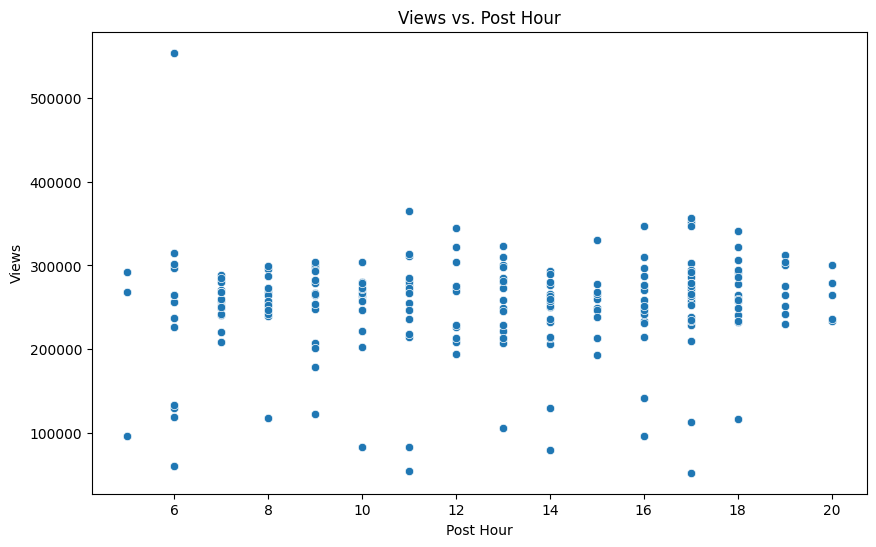

In [78]:
# Scatter plot of views vs. hour
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour', y='views', data=telegram_posts_df)
plt.title('Views vs. Post Hour')
plt.xlabel('Post Hour')
plt.ylabel('Views')
plt.show()

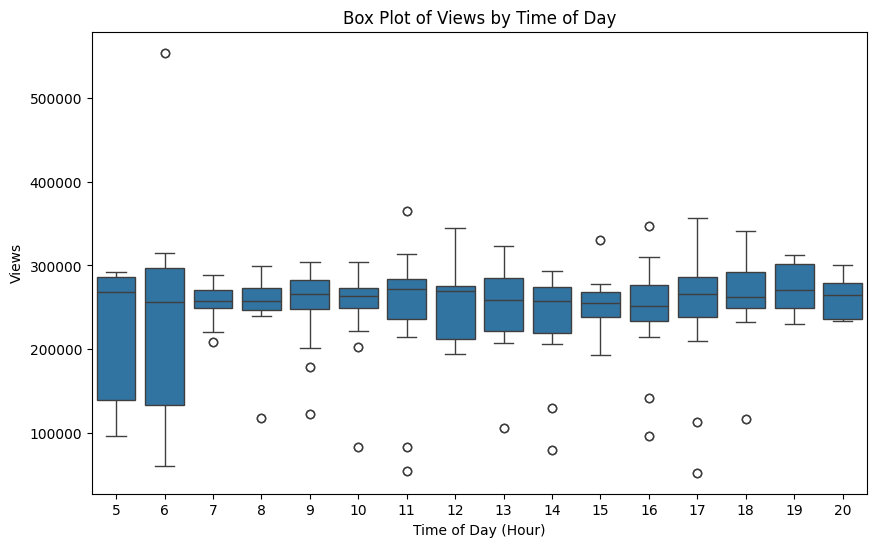

In [83]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='views', data=telegram_posts_df)
plt.title('Box Plot of Views by Time of Day')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Views')
plt.show()

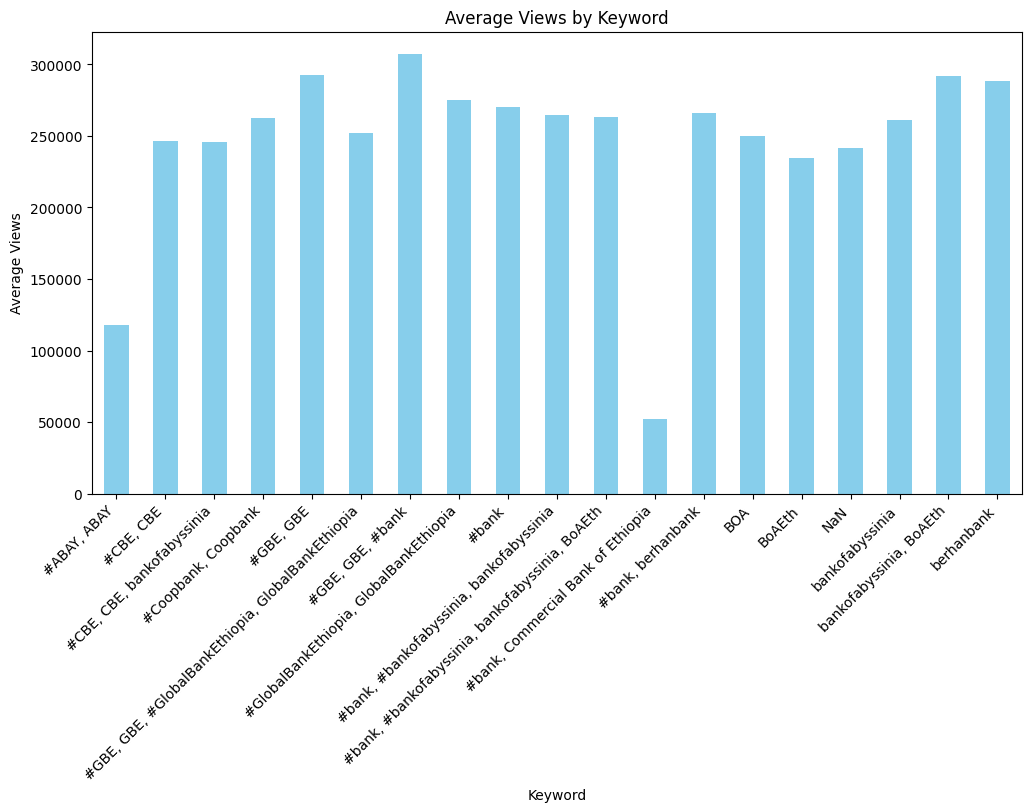

In [84]:
# Calculate the average views for each keyword
keyword_views = telegram_posts_df.groupby('keyword')['views'].mean()

# Plot the bar plot
plt.figure(figsize=(12, 6))
keyword_views.plot(kind='bar', color='skyblue')
plt.title('Average Views by Keyword')
plt.xlabel('Keyword')
plt.ylabel('Average Views')
plt.xticks(rotation=45, ha='right')
plt.show()

In [93]:
print(google_play_reviews_df.columns)

Index(['bank', 'appId', 'reviewId', 'userName', 'userImage', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion',
       'score', 'content', 'keywords', 'LDA_Category', 'Sentiment', 'Insight'],
      dtype='object')


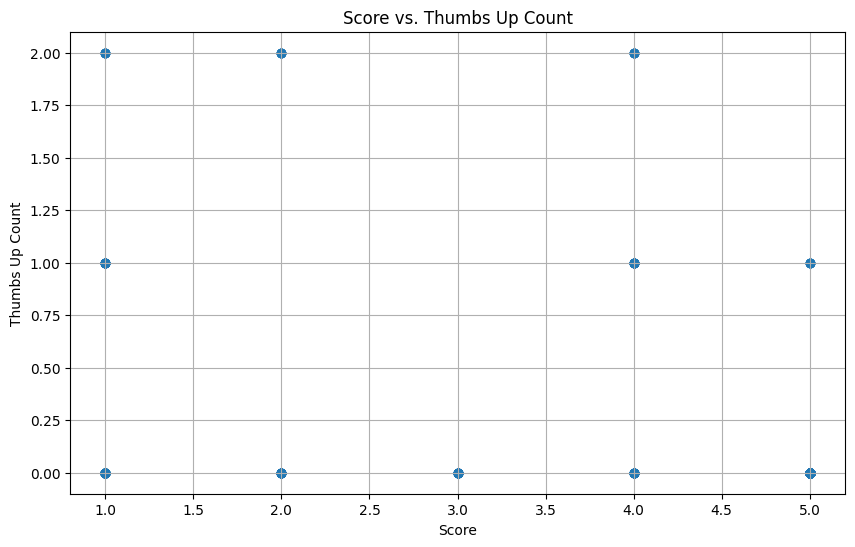

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(google_play_reviews_df['score'], google_play_reviews_df['thumbsUpCount'])
plt.title('Score vs. Thumbs Up Count')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.grid(True)
plt.show()


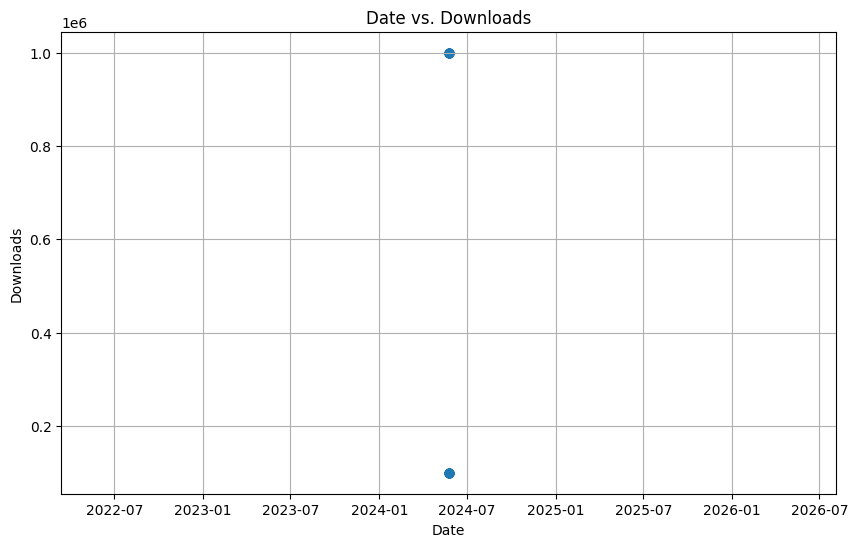

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(google_play_downloads_df['date'], google_play_downloads_df['downloads'])
plt.title('Date vs. Downloads')
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.grid(True)
plt.show()


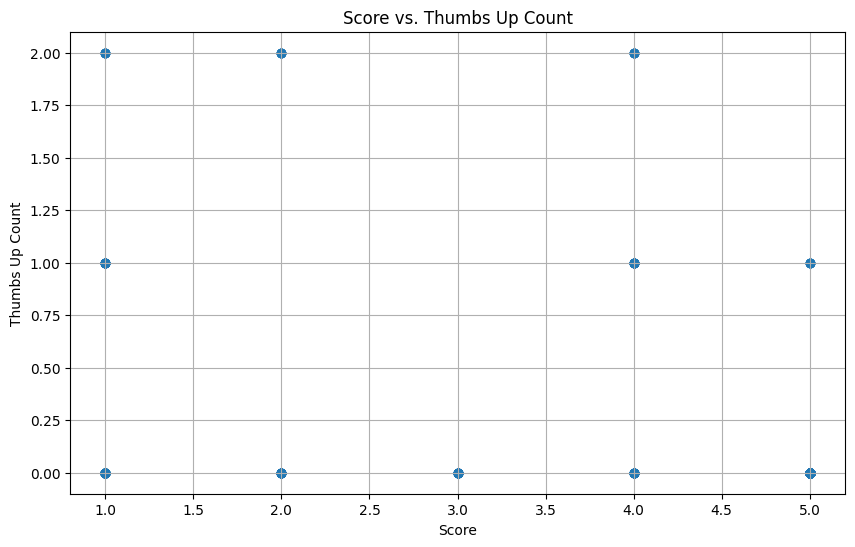

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(google_play_reviews_df['score'], google_play_reviews_df['thumbsUpCount'])
plt.title('Score vs. Thumbs Up Count')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.grid(True)
plt.show()

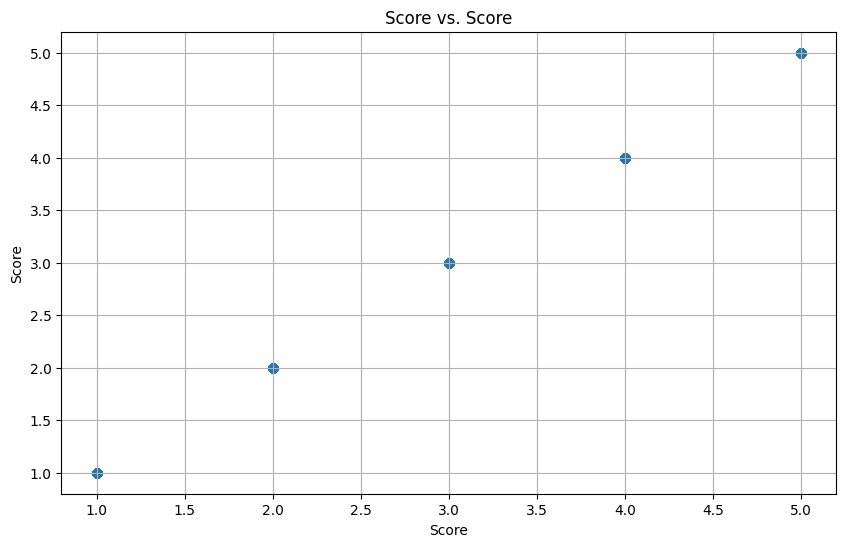

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(google_play_reviews_df['score'], google_play_reviews_df['score'])
plt.title('Score vs. Score')
plt.xlabel('Score')
plt.ylabel('Score')
plt.grid(True)
plt.show()

#### Data Enrichment

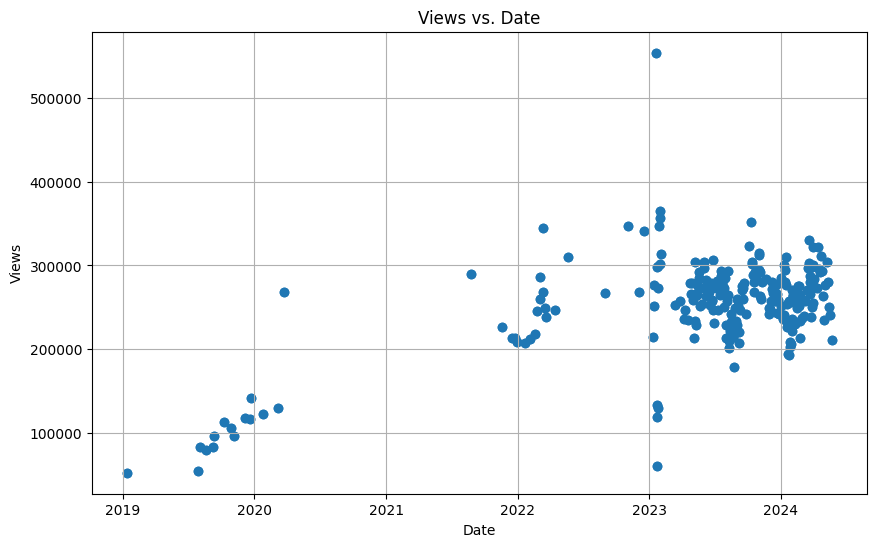

In [96]:
# Exploratory Analysis
# Analyze the distribution of views, likes, comments, and shares
post_metrics_distribution = telegram_posts_df[['views']].describe()

# Explore the relationship between engagement metrics and other variables
# For example, views vs. date
plt.figure(figsize=(10, 6))
plt.scatter(telegram_posts_df['date'], telegram_posts_df['views'])
plt.title('Views vs. Date')
plt.xlabel('Date')
plt.ylabel('Views')
plt.grid(True)
plt.show()

# Data Enrichment
# Extract additional features from the 'date' column
telegram_posts_df['day_of_week'] = telegram_posts_df['date'].dt.dayofweek
telegram_posts_df['month'] = telegram_posts_df['date'].dt.month

# Merge with external datasets containing information about trending topics or categories
# For example, merge with a dataset containing trending hashtags or topics

In [97]:
# Exploratory Analysis
# Analyze the distribution of review scores and sentiments
review_scores_distribution = google_play_reviews_df['score'].value_counts()
sentiment_distribution = google_play_reviews_df['Sentiment'].value_counts()

# Data Enrichment
# Perform sentiment analysis to extract additional insights from the review content
# For example, use NLP techniques to analyze review content and extract sentiment
# Enrich the dataset with information about the categories or genres of the reviewed apps

In [98]:
# Exploratory Analysis
# Analyze the trend of downloads over time
download_trend = google_play_downloads_df.groupby('date')['downloads'].sum()

# Data Enrichment
# Integrate demographic data or user segmentation information
# For example, merge with a dataset containing user demographics to analyze download behavior across different user groups

In [99]:
# Exploratory Analysis
# Analyze the growth trend of channel subscribers over time
subscriber_growth = boa_telegram_channel_subscriber_df.groupby('date')['subscriber_count'].sum()

# Data Enrichment
# Merge with engagement metrics such as views, likes, or comments
# For example, merge with a dataset containing channel engagement metrics to understand subscriber interaction with channel content
# Merge with external datasets containing information about relevant events or promotions

### Data Comparison

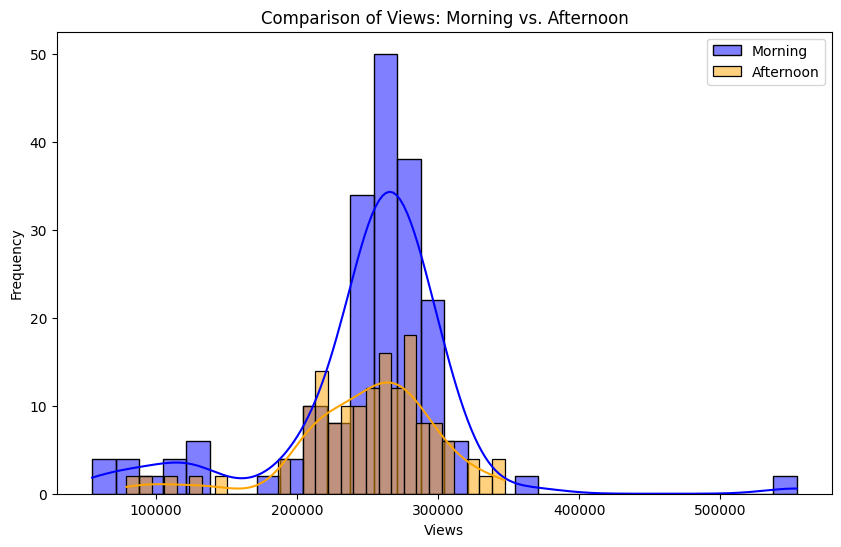

In [100]:
# Compare views between different times of day
views_morning = telegram_posts_df[telegram_posts_df['time_of_day'] == 'morning']['views']
views_afternoon = telegram_posts_df[telegram_posts_df['time_of_day'] == 'afternoon']['views']

plt.figure(figsize=(10, 6))
sns.histplot(views_morning, bins=30, kde=True, color='blue', label='Morning')
sns.histplot(views_afternoon, bins=30, kde=True, color='orange', label='Afternoon')
plt.title('Comparison of Views: Morning vs. Afternoon')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.legend()
plt.show()

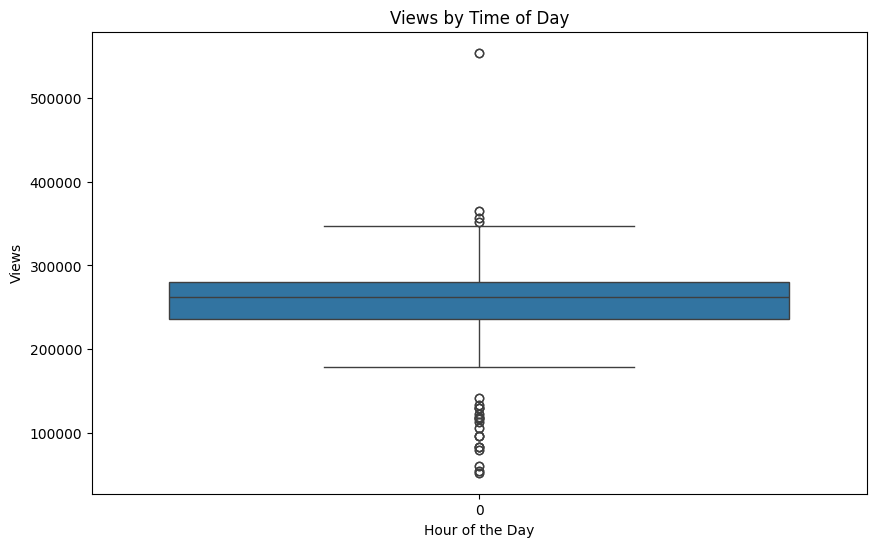

In [101]:
# Extract hour from the date column
telegram_posts_df['hour'] = telegram_posts_df['date'].dt.hour

# Plot boxplot of views by time_of_day
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='views', data=telegram_posts_df)
plt.title('Views by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Views')
plt.show()

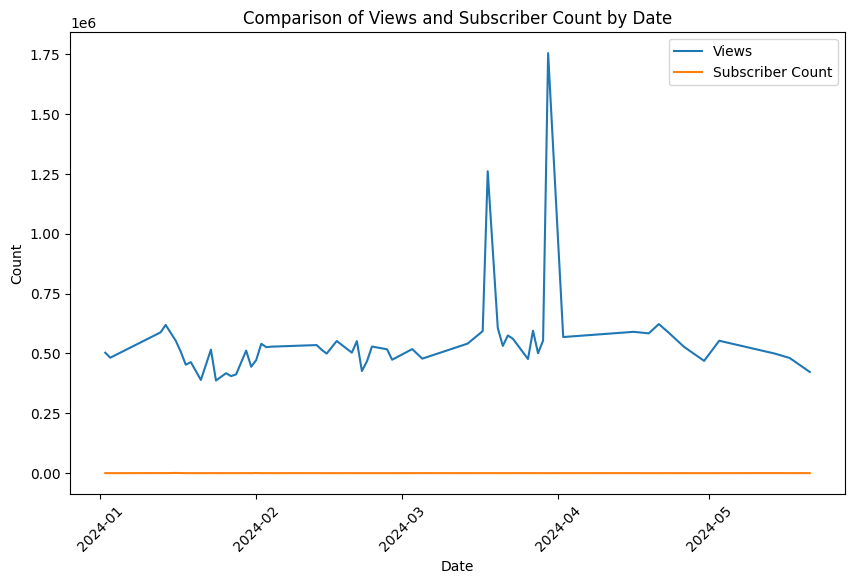

In [104]:
# Convert 'date' column to datetime in both dataframes
telegram_posts_df['date'] = pd.to_datetime(telegram_posts_df['date'])
boa_telegram_channel_subscriber_df['date'] = pd.to_datetime(boa_telegram_channel_subscriber_df['date'])

# Aggregate views by date
views_by_date = telegram_posts_df.groupby('date').agg({'views': 'sum'}).reset_index()

# Aggregate subscriber counts by date
subscriber_count_by_date = boa_telegram_channel_subscriber_df.groupby('date').agg({'subscriber_count': 'sum'}).reset_index()

# Merge the two dataframes on the date column
merged_df = pd.merge(views_by_date, subscriber_count_by_date, on='date', how='inner')

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date'], merged_df['views'], label='Views')
plt.plot(merged_df['date'], merged_df['subscriber_count'], label='Subscriber Count')
plt.title('Comparison of Views and Subscriber Count by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()

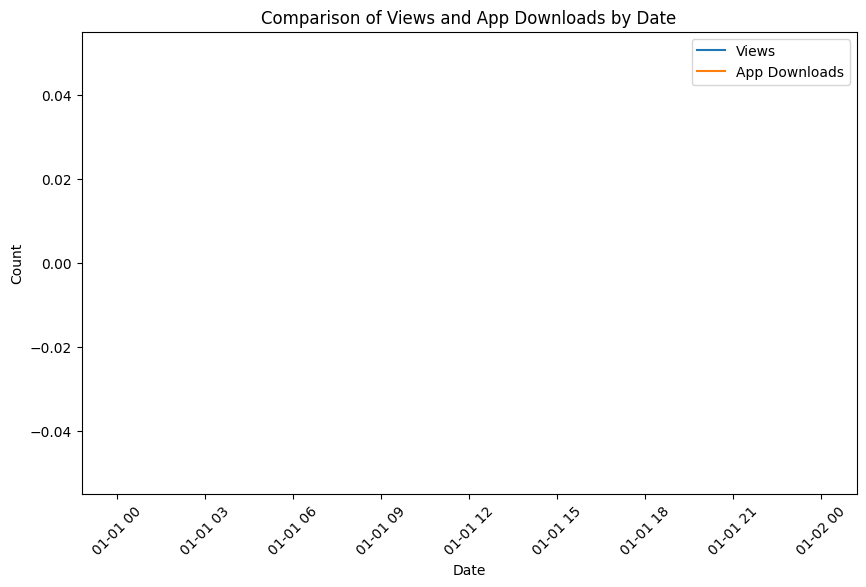

In [105]:
# Aggregate views by date
views_by_date = telegram_posts_df.groupby('date').agg({'views': 'sum'}).reset_index()

# Aggregate app downloads by date
downloads_by_date = google_play_downloads_df.groupby('date').agg({'downloads': 'sum'}).reset_index()

# Merge the two dataframes on the date column
merged_df = pd.merge(views_by_date, downloads_by_date, on='date', how='inner')

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date'], merged_df['views'], label='Views')
plt.plot(merged_df['date'], merged_df['downloads'], label='App Downloads')
plt.title('Comparison of Views and App Downloads by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()

###  Trends Over Time

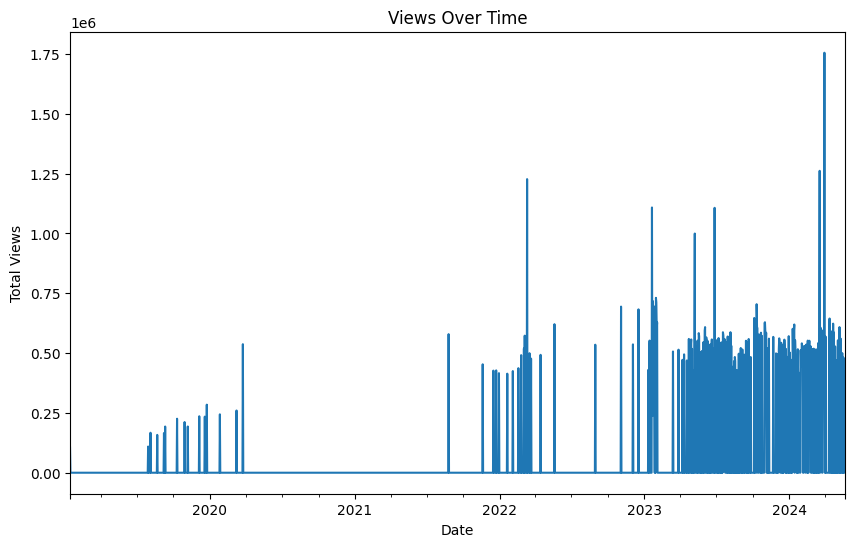

In [111]:
# Views over time
telegram_posts_df.set_index('date', inplace=True)
views_over_time = telegram_posts_df['views'].resample('D').sum()

plt.figure(figsize=(10, 6))
views_over_time.plot()
plt.title('Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.show()

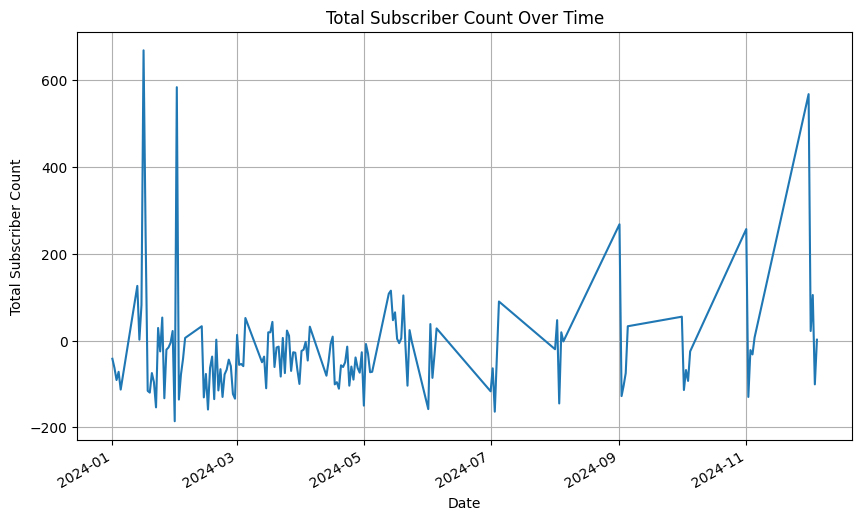

In [113]:
# Convert 'date' column to datetime
boa_telegram_channel_subscriber_df['date'] = pd.to_datetime(boa_telegram_channel_subscriber_df['date'])

# Group by date and calculate the total subscriber count
total_subscriber_count_by_date = boa_telegram_channel_subscriber_df.groupby('date')['subscriber_count'].sum()

# Plot the trend over time
plt.figure(figsize=(10, 6))
total_subscriber_count_by_date.plot()
plt.title('Total Subscriber Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Subscriber Count')
plt.grid(True)
plt.show()

In [115]:
print(google_play_reviews_df.columns)

Index(['bank', 'appId', 'reviewId', 'userName', 'userImage', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion',
       'score', 'content', 'keywords', 'LDA_Category', 'Sentiment', 'Insight'],
      dtype='object')


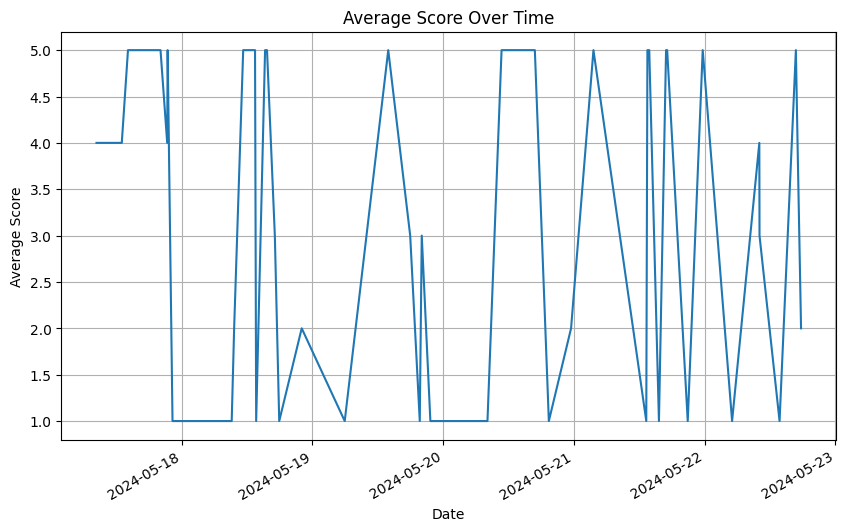

In [117]:
# Convert 'date' column to datetime
google_play_reviews_df['at'] = pd.to_datetime(google_play_reviews_df['at'])

# Group by at and calculate the average score
average_score_by_at = google_play_reviews_df.groupby('at')['score'].mean()

# Plot the trend over time
plt.figure(figsize=(10, 6))
average_score_by_at.plot()
plt.title('Average Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

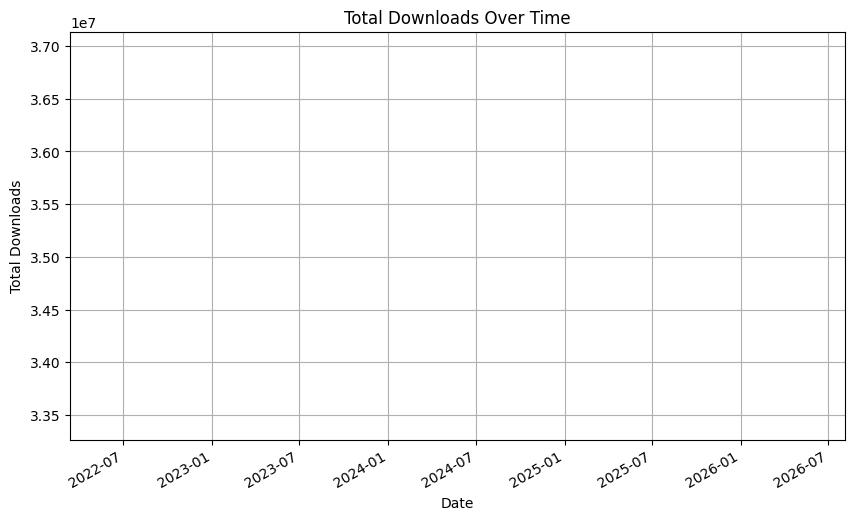

In [114]:
# Convert 'date' column to datetime
google_play_downloads_df['date'] = pd.to_datetime(google_play_downloads_df['date'])

# Group by date and calculate the total downloads
total_downloads_by_date = google_play_downloads_df.groupby('date')['downloads'].sum()

# Plot the trend over time
plt.figure(figsize=(10, 6))
total_downloads_by_date.plot()
plt.title('Total Downloads Over Time')
plt.xlabel('Date')
plt.ylabel('Total Downloads')
plt.grid(True)
plt.show()

### Correlation Between Different Datasets

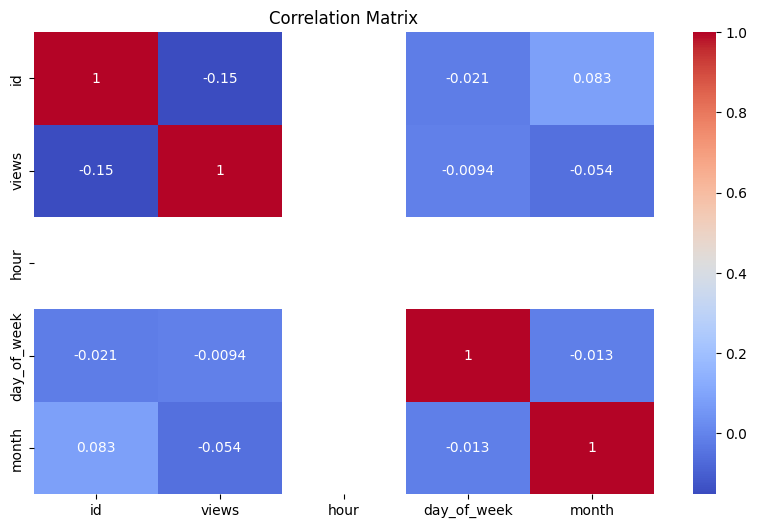

In [118]:
# Select only numeric columns for correlation
numeric_df = telegram_posts_df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [119]:
def plot_correlation_heatmap(df, title):
    # Select numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Compute the correlation matrix
    correlation_matrix = numeric_df.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Matrix for {title}')
    plt.show()

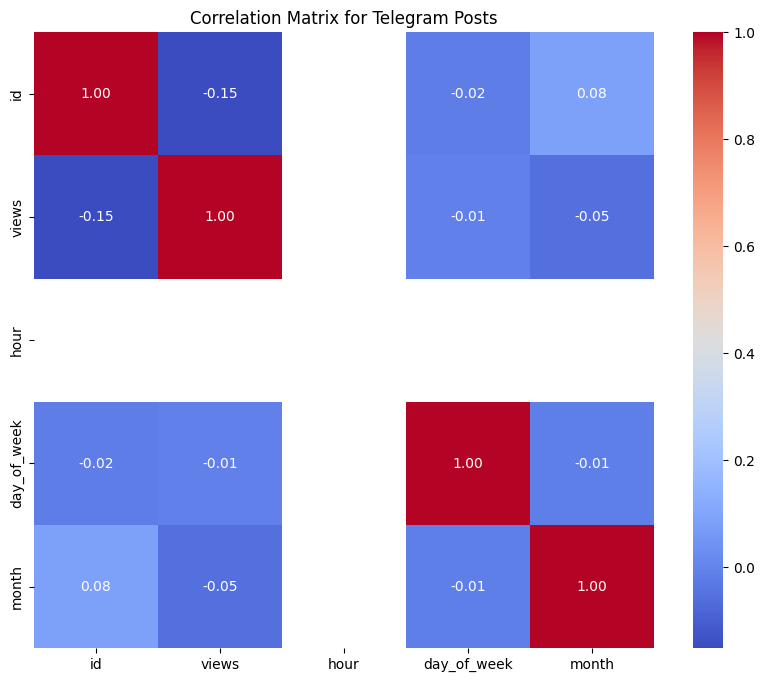

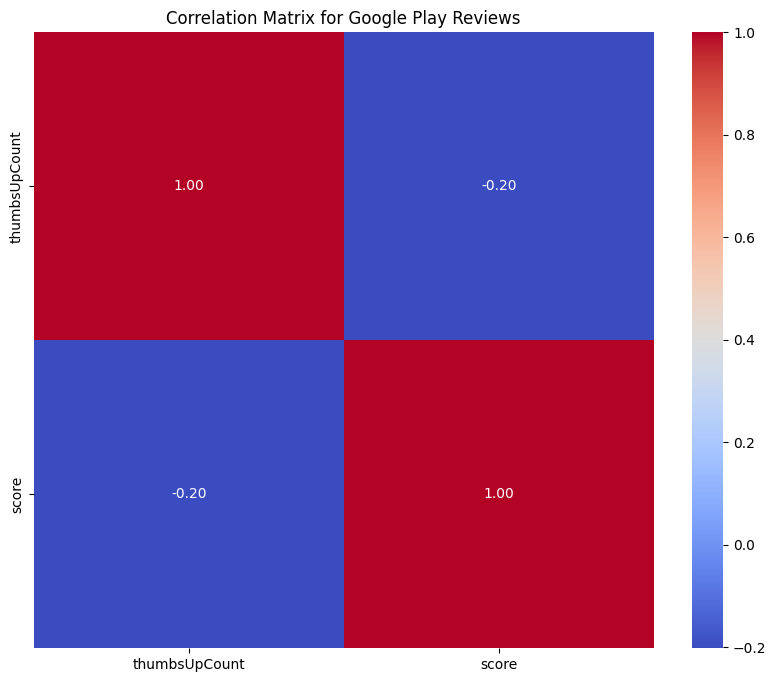

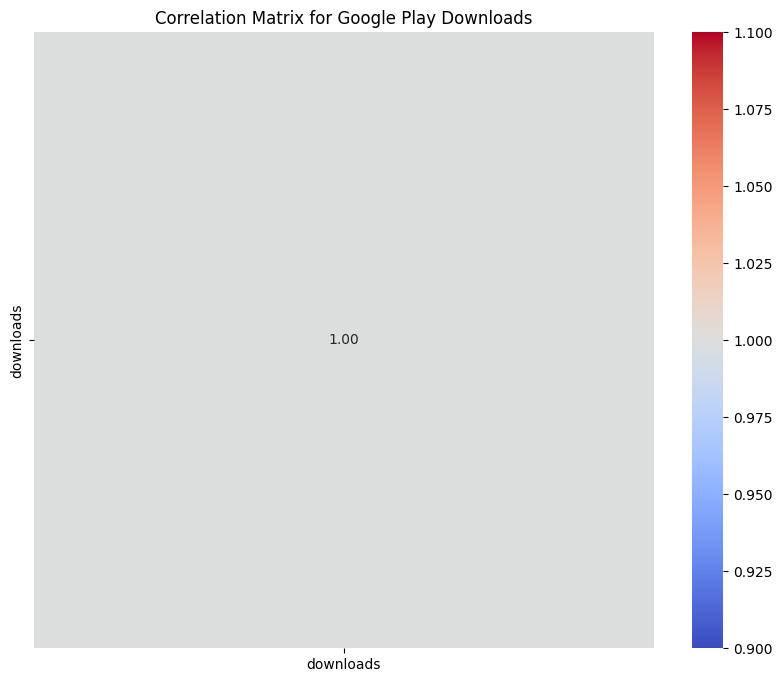

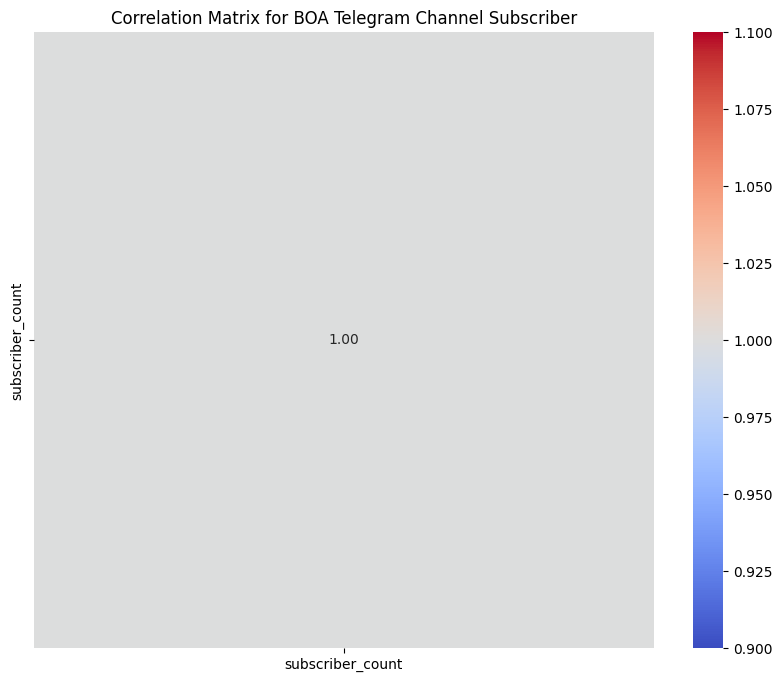

In [120]:
# Plot correlation heatmap for telegram_posts_df
plot_correlation_heatmap(telegram_posts_df, 'Telegram Posts')

# Plot correlation heatmap for google_play_reviews_df
plot_correlation_heatmap(google_play_reviews_df, 'Google Play Reviews')

# Plot correlation heatmap for google_play_downloads_df
plot_correlation_heatmap(google_play_downloads_df, 'Google Play Downloads')

# Plot correlation heatmap for boa_telegram_channel_subscriber_df
plot_correlation_heatmap(boa_telegram_channel_subscriber_df, 'BOA Telegram Channel Subscriber')

Correlation matrix between views and subscriber count:
                     views  subscriber_count
views             1.000000          0.358541
subscriber_count  0.358541          1.000000


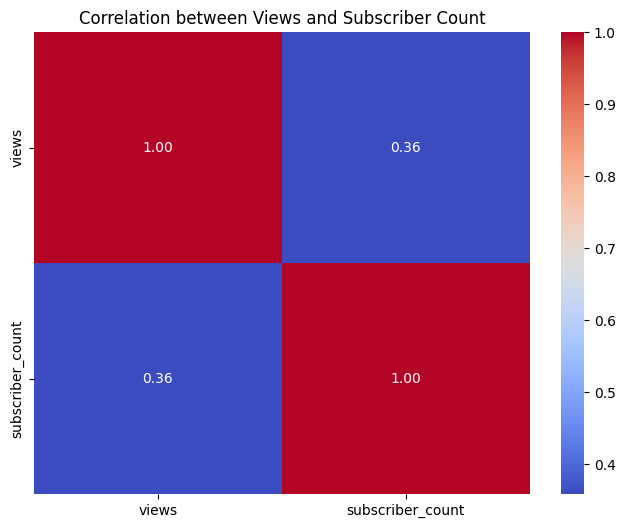

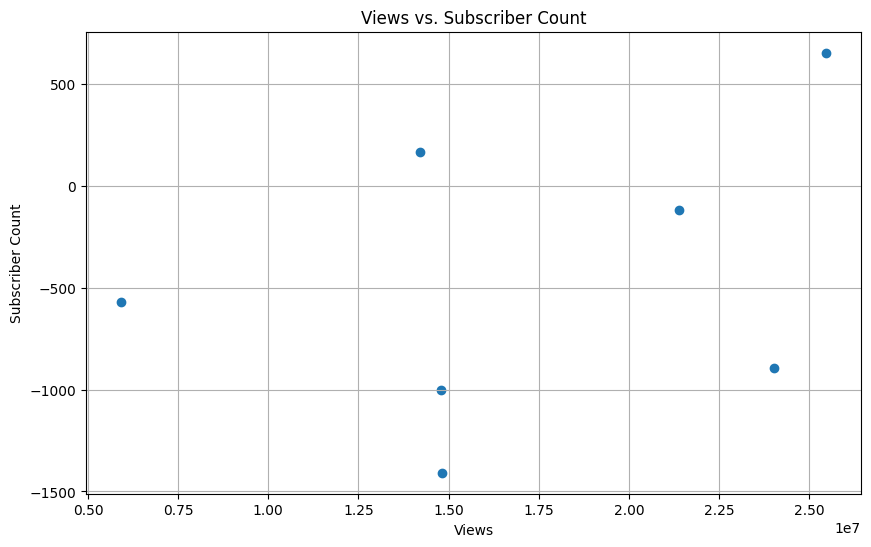

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrames
# telegram_posts_df = ...
# boa_telegram_channel_subscriber_df = ...

# Aggregate views by day_of_week in telegram_posts_df
views_by_day = telegram_posts_df.groupby('day_of_week').agg({'views': 'sum'}).reset_index()

# Aggregate subscriber count by date in boa_telegram_channel_subscriber_df
subscriber_count_by_date = boa_telegram_channel_subscriber_df.groupby('date').agg({'subscriber_count': 'sum'}).reset_index()

# Extract the day of the week from the 'date' column in boa_telegram_channel_subscriber_df
subscriber_count_by_date['day_of_week'] = subscriber_count_by_date['date'].dt.dayofweek

# Aggregate subscriber count by day_of_week
subscriber_count_by_day = subscriber_count_by_date.groupby('day_of_week').agg({'subscriber_count': 'sum'}).reset_index()

# Ensure the day_of_week column in both DataFrames are of the same type (str)
views_by_day['day_of_week'] = views_by_day['day_of_week'].astype(str)
subscriber_count_by_day['day_of_week'] = subscriber_count_by_day['day_of_week'].astype(str)

# Merge the two DataFrames on the 'day_of_week' column
merged_df = pd.merge(views_by_day, subscriber_count_by_day, on='day_of_week', how='inner')

# Compute the correlation matrix
correlation_matrix = merged_df[['views', 'subscriber_count']].corr()

# Print the correlation matrix
print("Correlation matrix between views and subscriber count:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Views and Subscriber Count')
plt.show()

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['views'], merged_df['subscriber_count'])
plt.title('Views vs. Subscriber Count')
plt.xlabel('Views')
plt.ylabel('Subscriber Count')
plt.grid(True)
plt.show()

### Outlier Detection

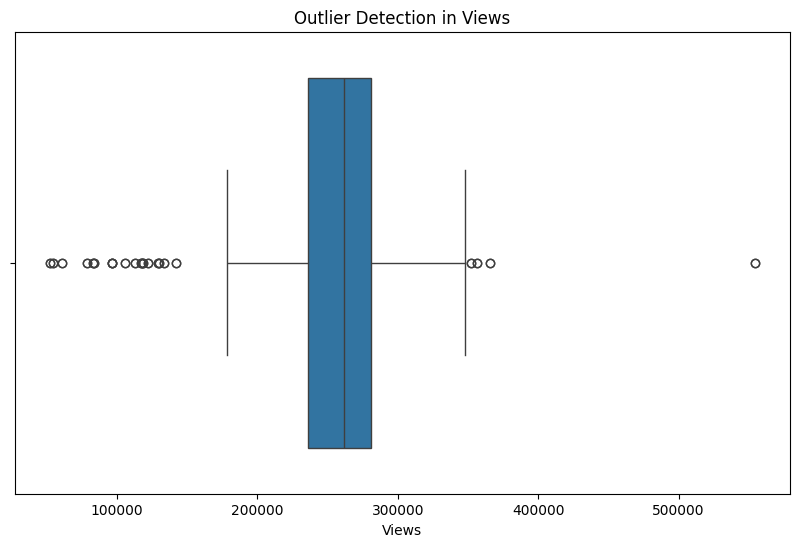

In [127]:
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=telegram_posts_df['views'])
plt.title('Outlier Detection in Views')
plt.xlabel('Views')
plt.show()

Correlation matrix between views and subscriber count:
                     views  subscriber_count
views             1.000000          0.358541
subscriber_count  0.358541          1.000000


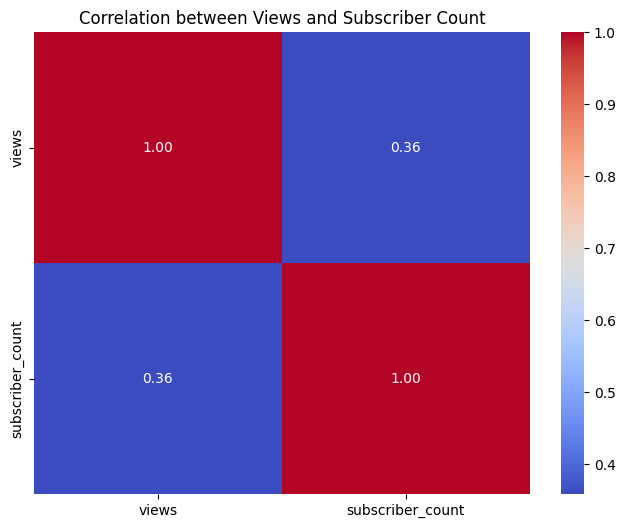

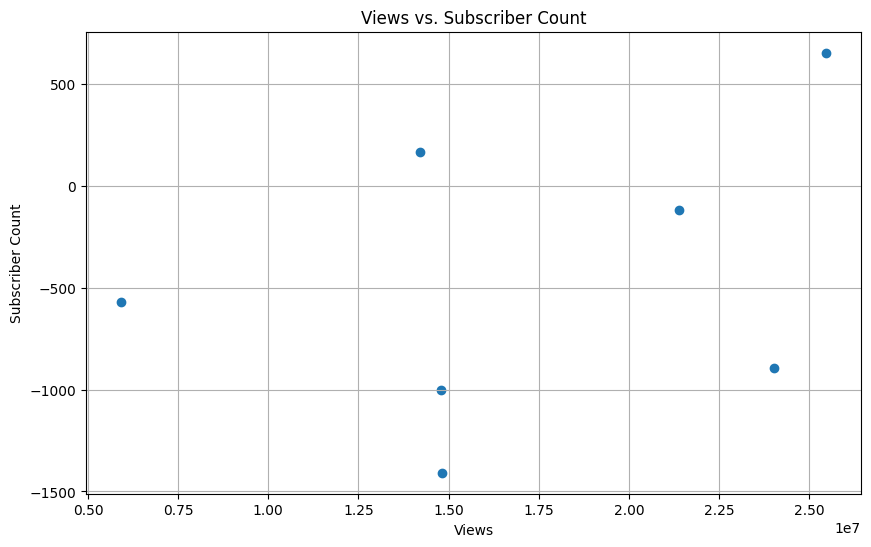

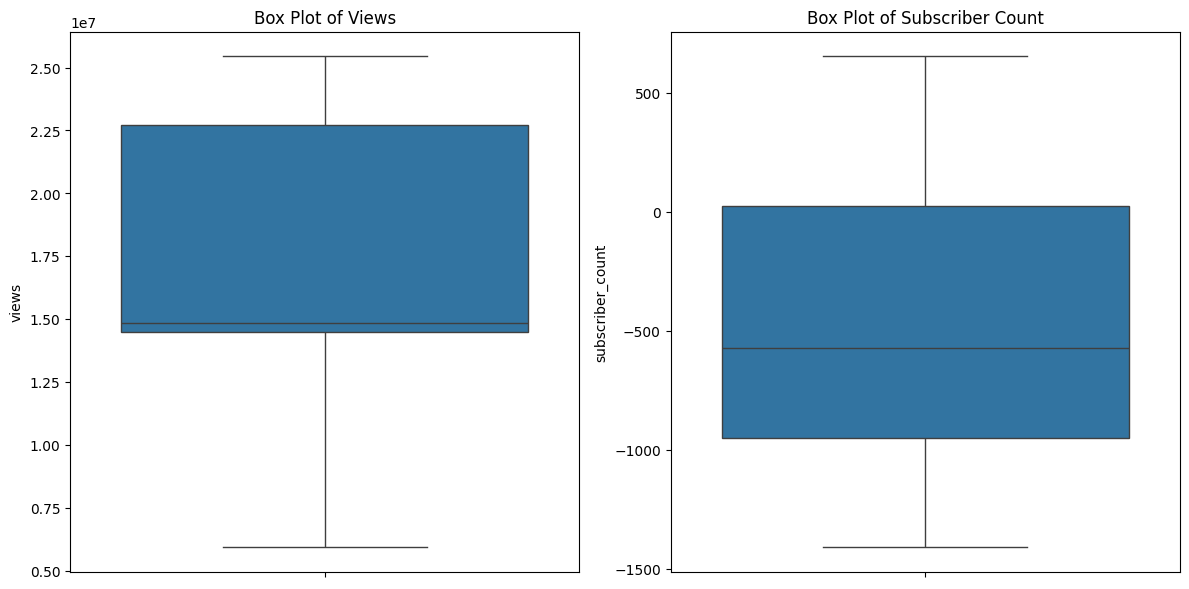

In [128]:
# Aggregate views by day_of_week in telegram_posts_df
views_by_day = telegram_posts_df.groupby('day_of_week').agg({'views': 'sum'}).reset_index()

# Aggregate subscriber count by date in boa_telegram_channel_subscriber_df
subscriber_count_by_date = boa_telegram_channel_subscriber_df.groupby('date').agg({'subscriber_count': 'sum'}).reset_index()

# Extract the day of the week from the 'date' column in boa_telegram_channel_subscriber_df
subscriber_count_by_date['day_of_week'] = subscriber_count_by_date['date'].dt.dayofweek

# Aggregate subscriber count by day_of_week
subscriber_count_by_day = subscriber_count_by_date.groupby('day_of_week').agg({'subscriber_count': 'sum'}).reset_index()

# Ensure the day_of_week column in both DataFrames are of the same type (str)
views_by_day['day_of_week'] = views_by_day['day_of_week'].astype(str)
subscriber_count_by_day['day_of_week'] = subscriber_count_by_day['day_of_week'].astype(str)

# Merge the two DataFrames on the 'day_of_week' column
merged_df = pd.merge(views_by_day, subscriber_count_by_day, on='day_of_week', how='inner')

# Compute the correlation matrix
correlation_matrix = merged_df[['views', 'subscriber_count']].corr()

# Print the correlation matrix
print("Correlation matrix between views and subscriber count:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Views and Subscriber Count')
plt.show()

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['views'], merged_df['subscriber_count'])
plt.title('Views vs. Subscriber Count')
plt.xlabel('Views')
plt.ylabel('Subscriber Count')
plt.grid(True)
plt.show()

# Box plots for outlier detection
plt.figure(figsize=(12, 6))

# Box plot for views
plt.subplot(1, 2, 1)
sns.boxplot(y=merged_df['views'])
plt.title('Box Plot of Views')

# Box plot for subscriber count
plt.subplot(1, 2, 2)
sns.boxplot(y=merged_df['subscriber_count'])
plt.title('Box Plot of Subscriber Count')

plt.tight_layout()
plt.show()

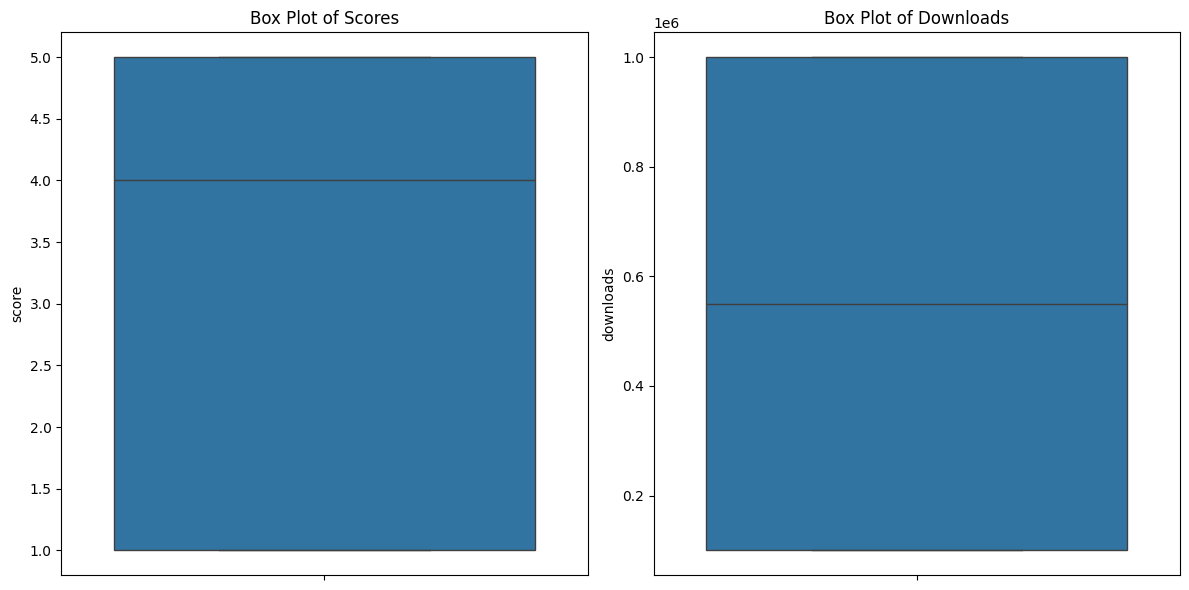

In [129]:
# Box plot for outlier detection in google_play_reviews_df
plt.figure(figsize=(12, 6))

# Box plot for scores
plt.subplot(1, 2, 1)
sns.boxplot(y=google_play_reviews_df['score'])
plt.title('Box Plot of Scores')

# Box plot for downloads
plt.subplot(1, 2, 2)
sns.boxplot(y=google_play_downloads_df['downloads'])
plt.title('Box Plot of Downloads')

plt.tight_layout()
plt.show()

### Visualization - Produce creative and informative plots.

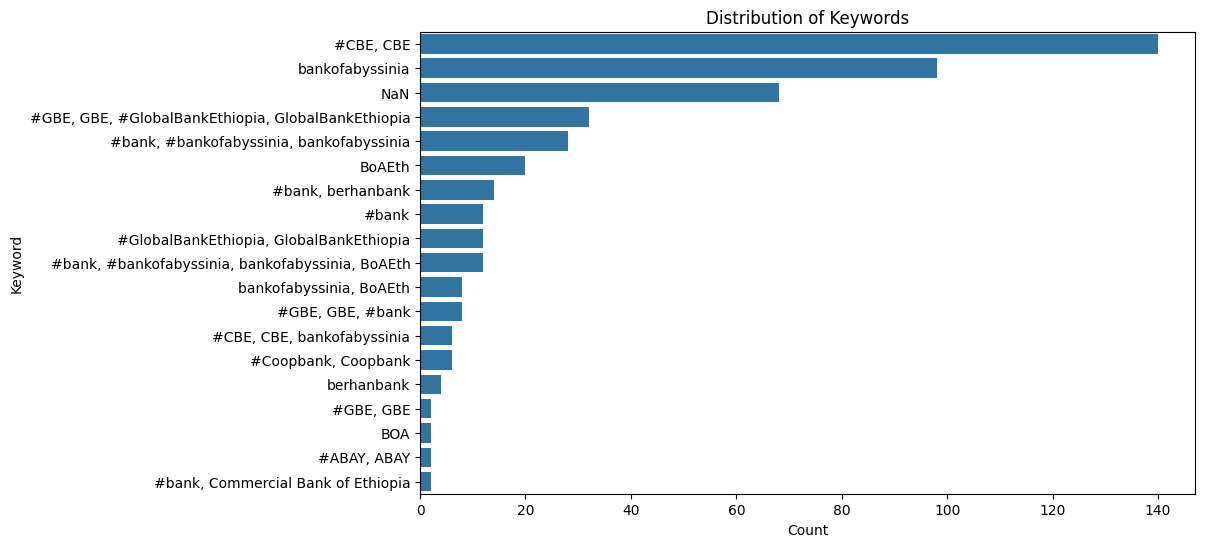

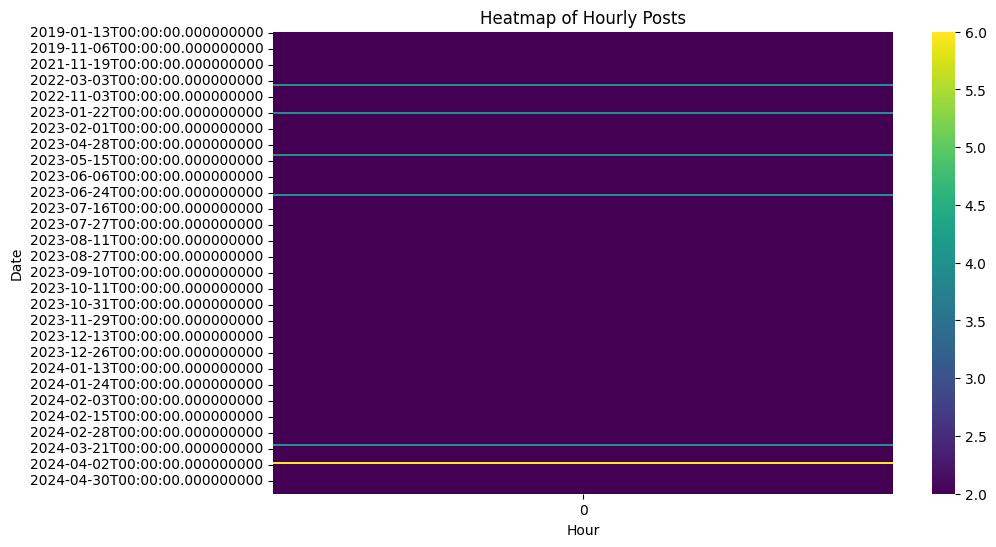

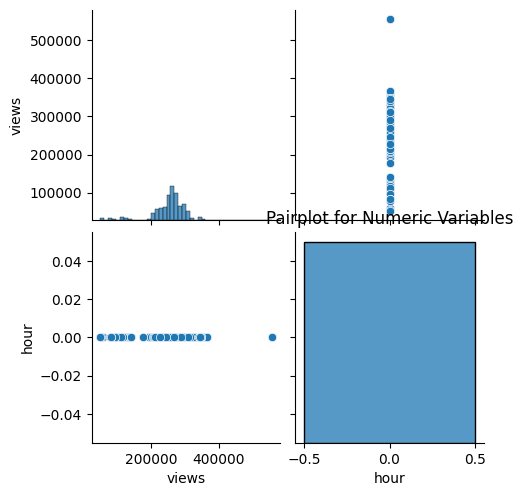

In [130]:
# Additional plots
# Plot 1: Distribution of Keywords
plt.figure(figsize=(10, 6))
sns.countplot(y='keyword', data=telegram_posts_df, order=telegram_posts_df['keyword'].value_counts().index)
plt.title('Distribution of Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

# Plot 2: Heatmap of Hourly Posts
hourly_posts = telegram_posts_df.pivot_table(index='date', columns='hour', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_posts, cmap='viridis')
plt.title('Heatmap of Hourly Posts')
plt.xlabel('Hour')
plt.ylabel('Date')
plt.show()

# Plot 3: Pairplot for Numeric Variables
numeric_telegram_posts_df = telegram_posts_df[['views', 'hour']]
sns.pairplot(numeric_telegram_posts_df)
plt.title('Pairplot for Numeric Variables')
plt.show()

#### Distribution of Views by Time of Day & Views by Keyword

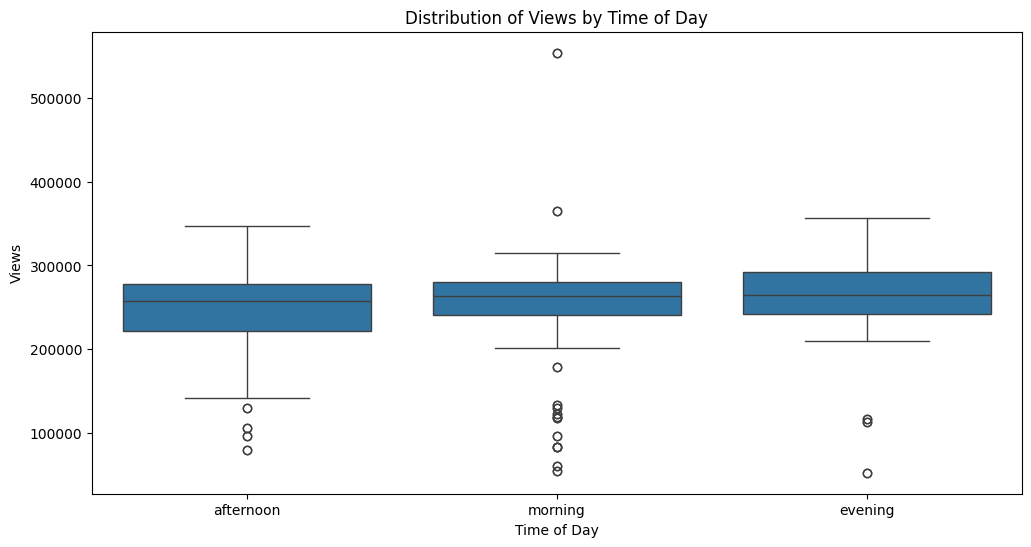

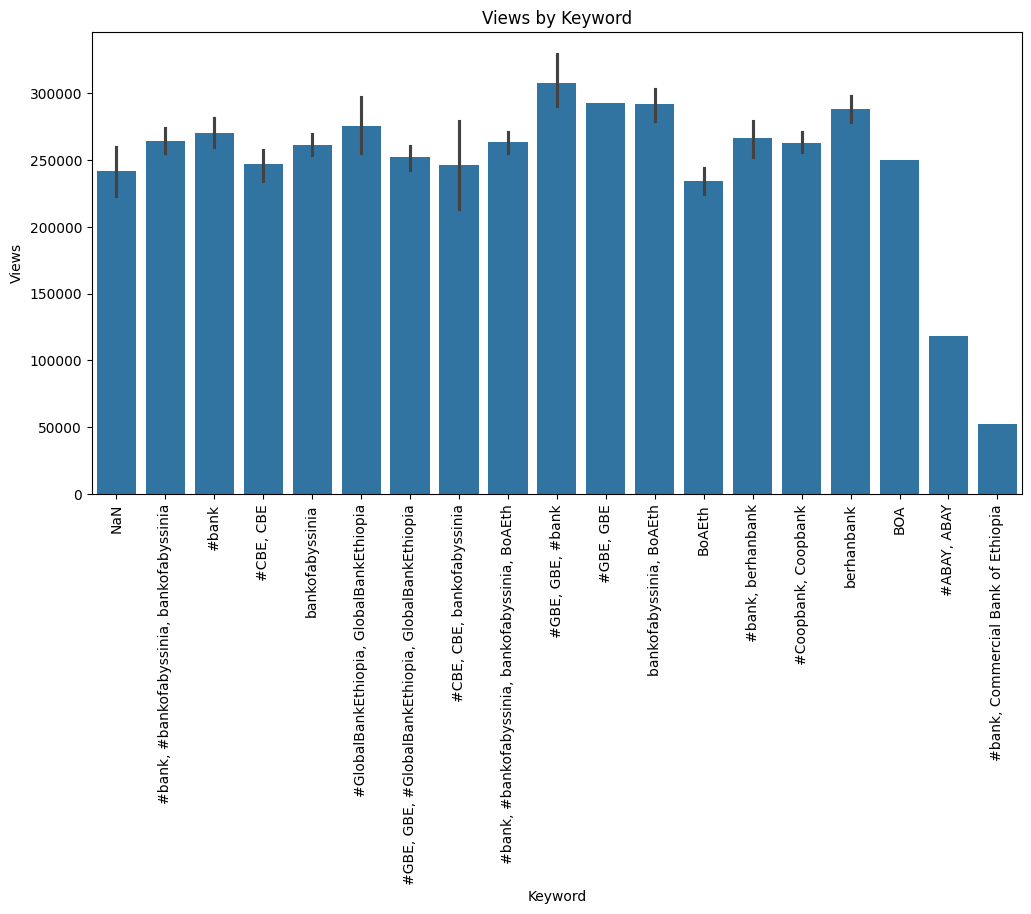

In [131]:
# Distribution of Views by Time of Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='time_of_day', y='views', data=telegram_posts_df)
plt.title('Distribution of Views by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Views')
plt.show()

# Views by Keyword
plt.figure(figsize=(12, 6))
sns.barplot(x='keyword', y='views', data=telegram_posts_df)
plt.title('Views by Keyword')
plt.xlabel('Keyword')
plt.ylabel('Views')
plt.xticks(rotation=90)
plt.show()

#### Trend of Subscriber Count Over Time

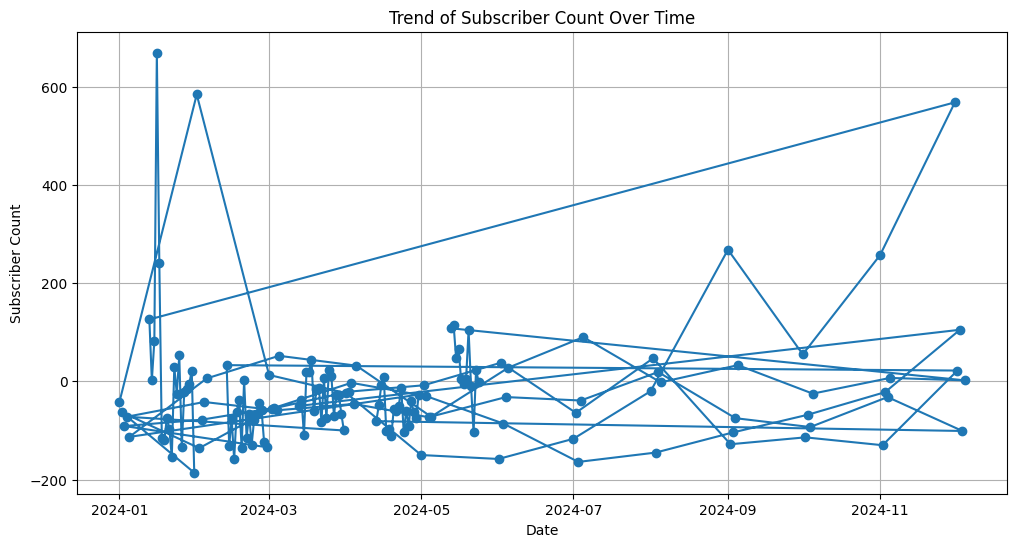

In [132]:
# Convert 'date' column to datetime
boa_telegram_channel_subscriber_df['date'] = pd.to_datetime(boa_telegram_channel_subscriber_df['date'])

# Trend of Subscriber Count Over Time
plt.figure(figsize=(12, 6))
plt.plot(boa_telegram_channel_subscriber_df['date'], boa_telegram_channel_subscriber_df['subscriber_count'], marker='o')
plt.title('Trend of Subscriber Count Over Time')
plt.xlabel('Date')
plt.ylabel('Subscriber Count')
plt.grid(True)
plt.show()

#### Trend of Average Score Over Time and Score Distribution

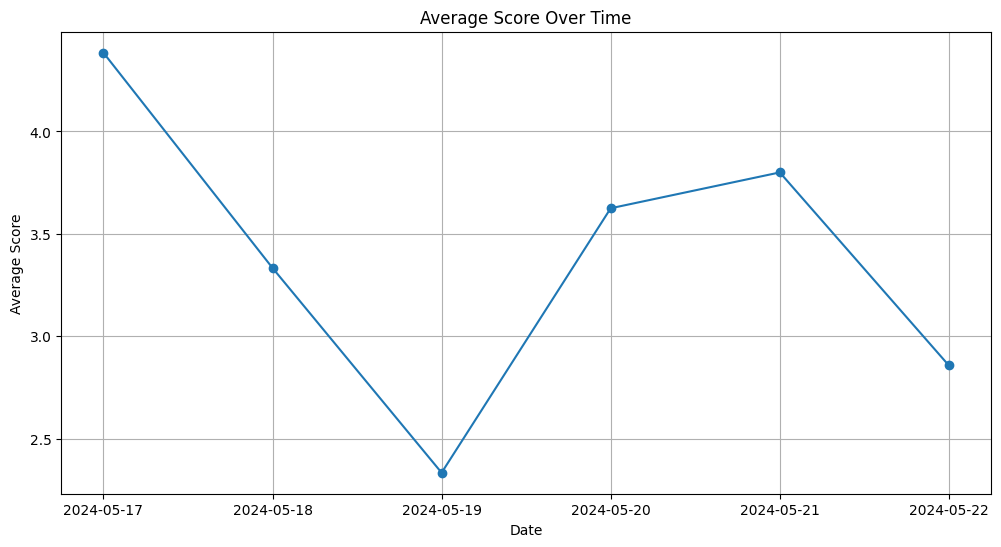

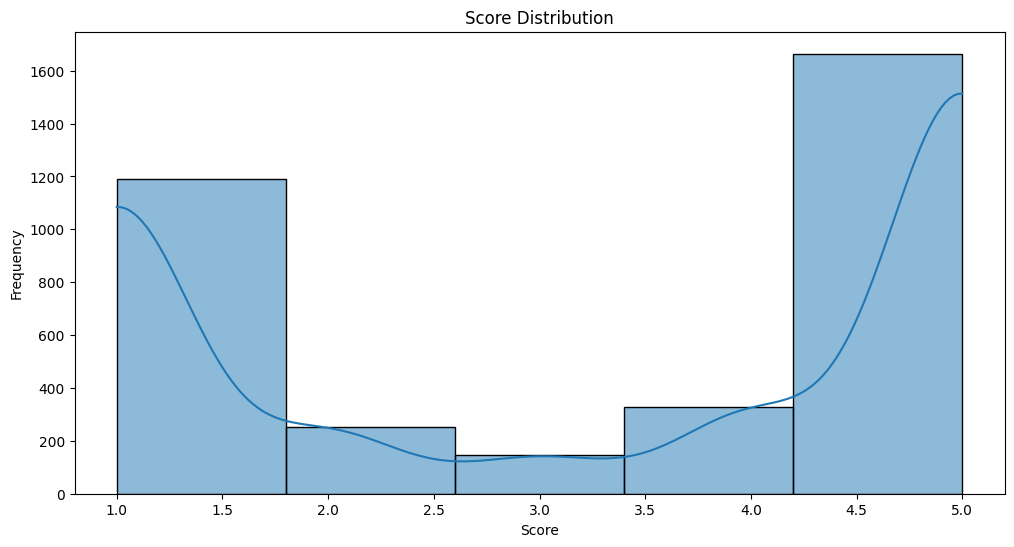

In [133]:
# Convert 'date' column to datetime
google_play_reviews_df['at'] = pd.to_datetime(google_play_reviews_df['at'])

# Group by date and calculate the average score
average_score_by_date = google_play_reviews_df.groupby(google_play_reviews_df['at'].dt.date)['score'].mean().reset_index()

# Trend of Average Score Over Time
plt.figure(figsize=(12, 6))
plt.plot(average_score_by_date['at'], average_score_by_date['score'], marker='o')
plt.title('Average Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

# Score Distribution
plt.figure(figsize=(12, 6))
sns.histplot(google_play_reviews_df['score'], bins=5, kde=True)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

#### Distribution of Downloads

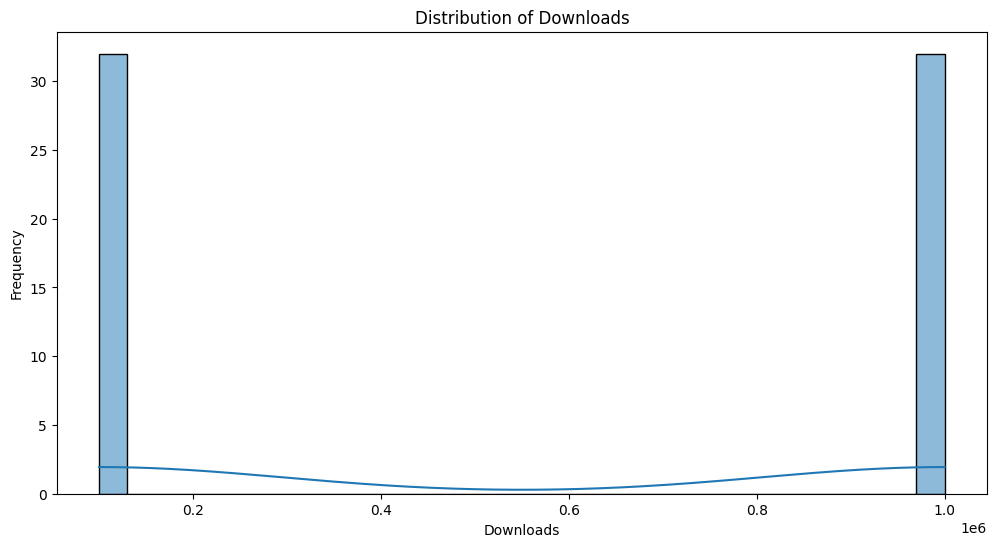

In [134]:
# Distribution of Downloads
plt.figure(figsize=(12, 6))
sns.histplot(google_play_downloads_df['downloads'], bins=30, kde=True)
plt.title('Distribution of Downloads')
plt.xlabel('Downloads')
plt.ylabel('Frequency')
plt.show()